### Clustering

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv("data/data_with_added_dummies.csv")

In [47]:
features_for_clustering = ["age", "education", "balance", "housing","unknown_education", 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']
df_for_cl = df[features_for_clustering]
my_normalizer = Normalizer()
normalized_data = my_normalizer.fit_transform(df_for_cl)

In [15]:
def cluster_data(k):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(normalized_data)
    print kmeans.cluster_centers_
    print "Inertia: {0}".format(kmeans.inertia_)
    print pd.DataFrame(kmeans.cluster_centers_, columns=df_for_cl.columns.values)
    return kmeans.inertia_, kmeans

In [16]:
res = []
for k in xrange(1, 10):
    inertia, model = cluster_data(k)
    res.append(inertia)

[[  2.31614260e-01   7.24306814e-02   7.12928409e-01   3.24947608e-03
    2.13946842e-04   5.26425179e-04   2.07821712e-04   1.18977658e-04
    5.08672354e-03]]
Inertia: 19567.5423777
        age  education   balance   housing  unknown_education  \
0  0.231614   0.072431  0.712928  0.003249           0.000214   

   poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0          0.000526        0.000208          0.000119          0.005087  
[[  6.68629084e-01   2.08798580e-01  -3.10369441e-01   9.20719393e-03
    6.07103325e-04   1.34408495e-03   5.56605909e-04   2.47973129e-04
    1.49705900e-02]
 [  1.19585645e-01   3.74728127e-02   9.75250497e-01   1.72221695e-03
    1.13161298e-04   3.16818349e-04   1.18410990e-04   8.59097088e-05
    2.55299742e-03]]
Inertia: 5000.86047315
        age  education   balance   housing  unknown_education  \
0  0.668629   0.208799 -0.310369  0.009207           0.000607   
1  0.119586   0.037473  0.975250  0.001722           0.000113  

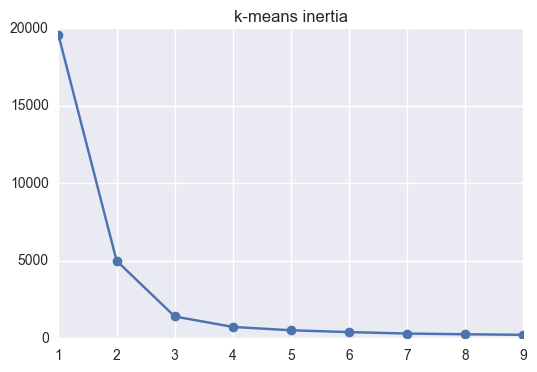

In [17]:
elbow_plt = plt.plot(range(1, 10), res, '-o')
plt.title("k-means inertia")
#plt.show() 
plt.savefig("choose_cluster_number.png")

In [48]:
# chose k = 2
inertia, kmeans = cluster_data(2)
df_for_cl["cluster"] = kmeans.predict(normalized_data)
df_for_cl["cluster"].value_counts()

[[  6.68629084e-01   2.08798580e-01  -3.10369441e-01   9.20719393e-03
    6.07103325e-04   1.34408495e-03   5.56605909e-04   2.47973129e-04
    1.49705900e-02]
 [  1.19585645e-01   3.74728127e-02   9.75250497e-01   1.72221695e-03
    1.13161298e-04   3.16818349e-04   1.18410990e-04   8.59097088e-05
    2.55299742e-03]]
Inertia: 5000.86047315
        age  education   balance   housing  unknown_education  \
0  0.668629   0.208799 -0.310369  0.009207           0.000607   
1  0.119586   0.037473  0.975250  0.001722           0.000113   

   poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0          0.001344        0.000557          0.000248          0.014971  
1          0.000317        0.000118          0.000086          0.002553  


/Users/vky565/anaconda/envs/bootcamp/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


1    35986
0     9225
Name: cluster, dtype: int64

In [26]:
def print_by_cluster(df_for_cl, col):
    group_plot = sns.countplot(x="cluster", hue=col, data=df_for_cl, palette="Set3")
    group_plot.set(xlabel="", ylabel="")
    group_plot.set_title(col)
    plt.show()

In [53]:
def plot_clusters(df_for_cl):
    age_edu_plot = sns.lmplot(x="age", y="balance", hue="cluster", data=df_for_cl, fit_reg=False, legend=False)
    plt.show()
    df_for_cl.hist("balance", by="cluster")
    plt.show()
    categorical_vars = ['education', 'housing', 'unknown_education', 
                    'poutcome_failure', 'poutcome_other', 'poutcome_success',
                   'poutcome_unknown']
    for col in categorical_vars:
        print_by_cluster(df_for_cl, col)

In [37]:
def get_cluster_stats(df_for_cl, df, num_of_clusters):
    for i in range(num_of_clusters):
        print "percentage in {0} cluster: {1}".format(i, df["y"].loc[df_for_cl["cluster"] == i].mean())

In [38]:
get_cluster_stats(df_for_cl, df, 2)

percentage in 0 cluster: 0.069593495935
percentage in 1 cluster: 0.129133551937


In [55]:
df_for_cl["cluster"].value_counts()

1    35986
0     9225
Name: cluster, dtype: int64

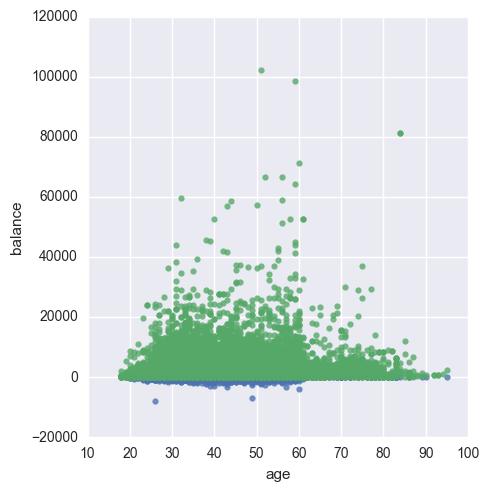

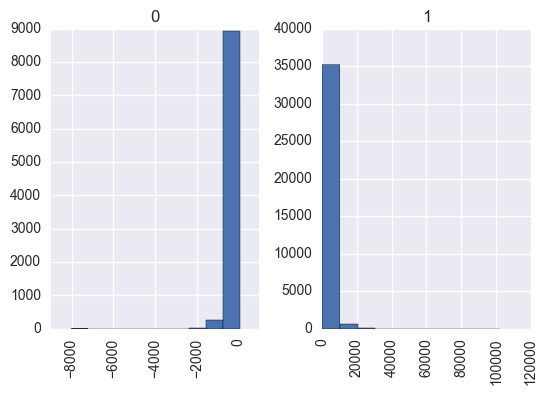

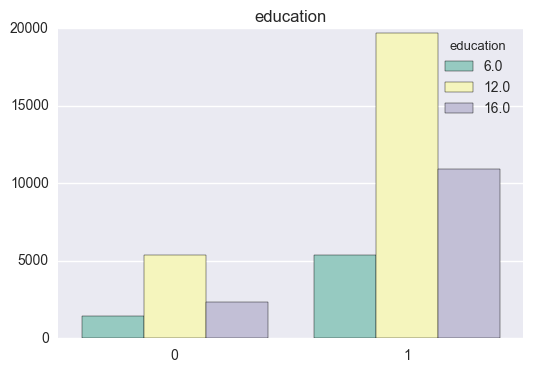

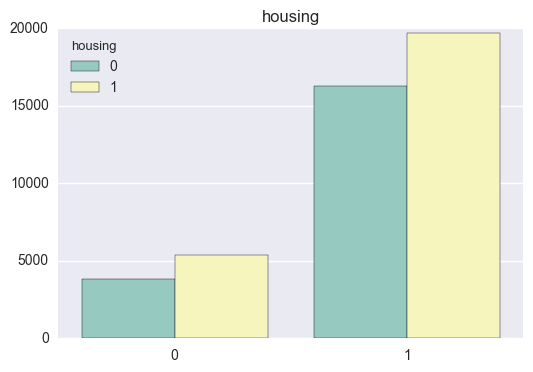

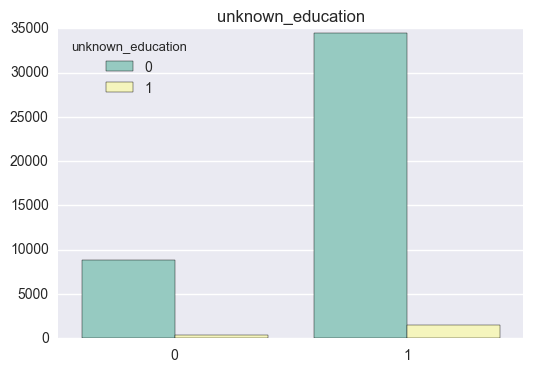

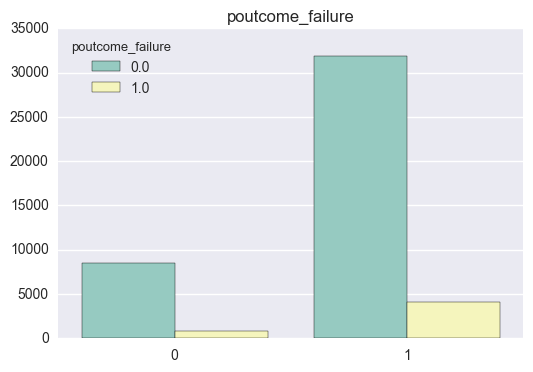

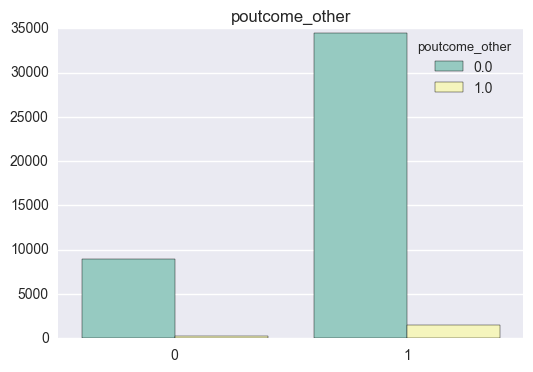

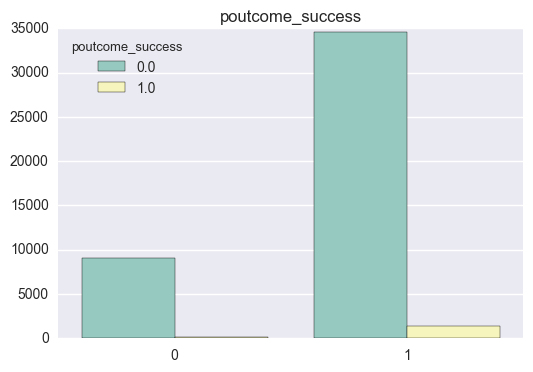

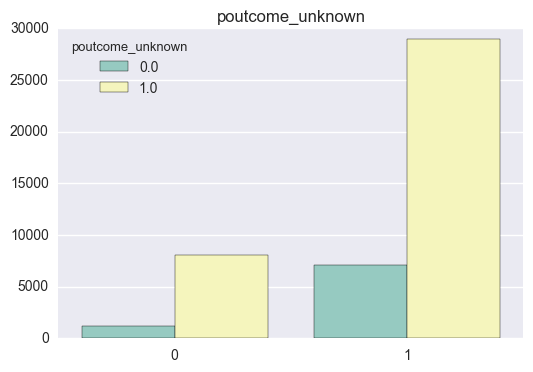

In [54]:
plot_clusters(df_for_cl)

In [43]:
inertia, kmeans = cluster_data(3)
df_for_cl["cluster"] = kmeans.predict(normalized_data)
df_for_cl["cluster"].value_counts()

[[  1.05588928e-01   3.30953295e-02   9.83169655e-01   1.54376169e-03
    1.02021620e-04   2.89729001e-04   1.06279666e-04   8.41912108e-05
    2.23607248e-03]
 [  2.11516902e-01   6.47641481e-02  -9.53103667e-01   4.06566852e-03
    1.71184883e-04   4.79526536e-04   2.18801270e-04   3.95366678e-05
    4.81500198e-03]
 [  9.08017696e-01   2.84256690e-01   1.27324034e-01   1.18537483e-02
    8.27278428e-04   1.80145268e-03   7.39068827e-04   3.43074408e-04
    2.02942080e-02]]
Inertia: 1405.61584596
        age  education   balance   housing  unknown_education  \
0  0.105589   0.033095  0.983170  0.001544           0.000102   
1  0.211517   0.064764 -0.953104  0.004066           0.000171   
2  0.908018   0.284257  0.127324  0.011854           0.000827   

   poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0          0.000290        0.000106          0.000084          0.002236  
1          0.000480        0.000219          0.000040          0.004815  
2          0.

/Users/vky565/anaconda/envs/bootcamp/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0    35187
2     6656
1     3368
Name: cluster, dtype: int64

In [44]:
get_cluster_stats(df_for_cl, df, 3)

percentage in 0 cluster: 0.13058800125
percentage in 1 cluster: 0.0555225653207
percentage in 2 cluster: 0.076171875


,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,16.0,0,2143,1,0,5,261,1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,12.0,0,29,1,0,5,151,1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,12.0,0,2,1,1,5,76,1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,12.0,0,1506,1,0,5,92,1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,12.0,0,1,0,0,5,198,1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
df["cluster"] = df_for_cl["cluster"]

In [52]:
df.to_csv("data/data_with_clusters.csv")